# Feature Selection

The intention of this section is to find the features highly correlated with a book's popularity. 

We're going to look at each of the discretised features and compare the different features of a book with that book's popularity score to see if there are any stand out features we should use to build a regression for finding the characteristics of the most popular books.

In [17]:
# load in libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import normalized_mutual_info_score
from sklearn.model_selection import train_test_split

# read in files we want to use
books_df = pd.read_csv("BX-Books-Clean.csv")

### Create a Training Set
We'll make our training set a to be 70% of our entire dataset.

In [18]:
# set a seed value so we can reproduce results
seed = 8190390

# split the DataFrame into training and testing sets
train_df, test_df = train_test_split(books_df, test_size=0.3, random_state=seed)

### Calculating MI's of each discretised feature

In [19]:
# the feature we want to calculate MI against
book_popularity = train_df["Popularity-Score-Discrete"]
# the other features we want to compare against book popularity
discretised_features = train_df[["Book-Author", "Year-Of-Publication-Discrete", "Country-Freq-Discrete", "Median-Age-Discrete"]]

non_discrete_features = train_df[["Book-Author", "Year-Of-Publication", "Country-Freq", "Median-Age"]]

# calculate all the mutual information values of the features against book popularity
mutual_infos = dict()
for feature in discretised_features.columns:
    mutual_infos[feature] = normalized_mutual_info_score(discretised_features[feature], book_popularity, average_method="min")

In [20]:
# Let's observe the mutual information values:
print("Normalised Mutual Information Scores:\n")
for key in mutual_infos:
    print(f"Popularity vs {key}: {mutual_infos[key]}")

Normalised Mutual Information Scores:

Popularity vs Book-Author: 0.47212641946587686
Popularity vs Year-Of-Publication-Discrete: 0.007062472152741867
Popularity vs Country-Freq-Discrete: 0.21520270315298734
Popularity vs Median-Age-Discrete: 0.006140861426658971


We see that there is a lot of information gain about the popularity of a book given its author. i.e., the specific author of a book is highly correlated with how popular that book is.

We also see that out of all continuous data features, the country frequency has a the highest mutual information score when compared against a book's popularity. Year of publication and median age have much less association with the book's popularity.

From this, we decide to only consider constructing a regression between Country Frequency and Book popularity. We'll also do further analysis on the popular authors.

### Visualising the Relationships
Here we'll plot the features against the popularity to further highlight the presence or lack of relationship between features. This is just to validate the MI scores.

In [21]:
# First, grab a sample, we can't plot all this data it'll introduce too much noise
sample = train_df.sample(1000)

#### Book Popularity vs Year of Publication

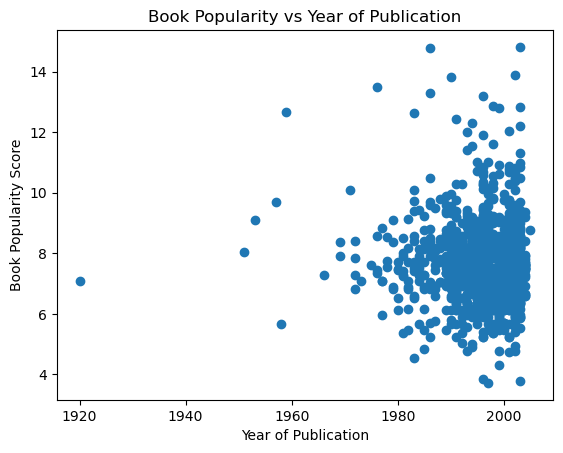

In [22]:
plt.scatter(x=sample["Year-Of-Publication"], y=sample["Popularity-Score"])
plt.title("Book Popularity vs Year of Publication")
plt.xlabel("Year of Publication")
plt.ylabel("Book Popularity Score")
plt.show()

There's not really any relationship to observe here, just that a lot of books from the early 2000's are being reviewed

#### Book Popularity vs Number of Unique Countries that Reviewed the Book

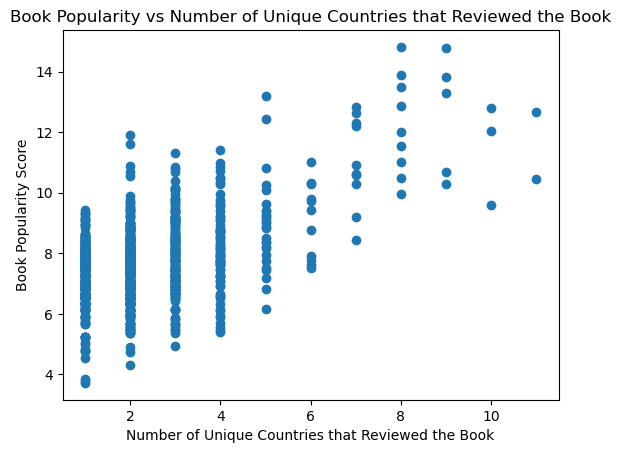

In [23]:
plt.scatter(x=sample["Country-Freq"], y=sample["Popularity-Score"])
plt.title("Book Popularity vs Number of Unique Countries that Reviewed the Book")
plt.xlabel("Number of Unique Countries that Reviewed the Book")
plt.ylabel("Book Popularity Score")
plt.show()

Here we see a slight positive, linear relationship, though the data is quite noisy.

#### Book Popularity vs Median Reviwer Age

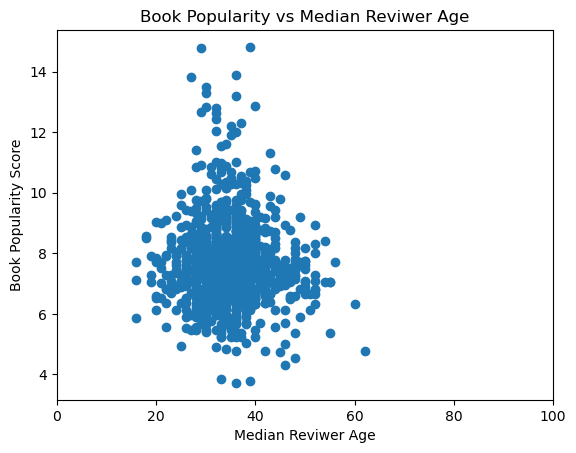

In [24]:
plt.scatter(x=sample["Median-Age"], y=sample["Popularity-Score"])
plt.title("Book Popularity vs Median Reviwer Age")
plt.xlabel("Median Reviwer Age")
plt.ylabel("Book Popularity Score")
plt.xlim(0, 100)
plt.show()

There's not really any relationship to observe here, just that a lot of books being reviewed by people in their early 30's. If anything, the most you could do is put a flat line through the data, which shows that the age doesn't really affect the book popularity.